In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

import pickle


In [2]:
car_data = pd.read_csv('/home/hasan/DATA SET/datasets_33080_43333_car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# shape of the dataset
car_data.shape

(301, 9)

In [8]:
# checking null data
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Categorical columns

In [16]:
# total unique in Car_Name column
car_data['Car_Name'].nunique()

98

In [17]:
#total unique in Fuel_Type
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [18]:
# total unique in Seller_Type
car_data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [19]:
# total unique in Transmission
car_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [20]:
#total unique in Owner
car_data['Owner'].unique()

array([0, 1, 3])

#### drop unnecessary column

In [22]:
car_data.drop(['Car_Name'], axis=1, inplace=True)

In [23]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
car_data['current_year'] = 2020
car_data.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [25]:
#years of car
car_data['n_year'] = car_data['current_year'] - car_data['Year']
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,n_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [26]:
#dropping 'Year', and current_year column
car_data.drop(['Year', 'current_year'], axis=1, inplace=True)
car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,n_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


#### making dummies columns

In [27]:
car_data = pd.get_dummies(car_data, drop_first=True)
car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Features Selection

##### correlation

In [28]:
car_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
n_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


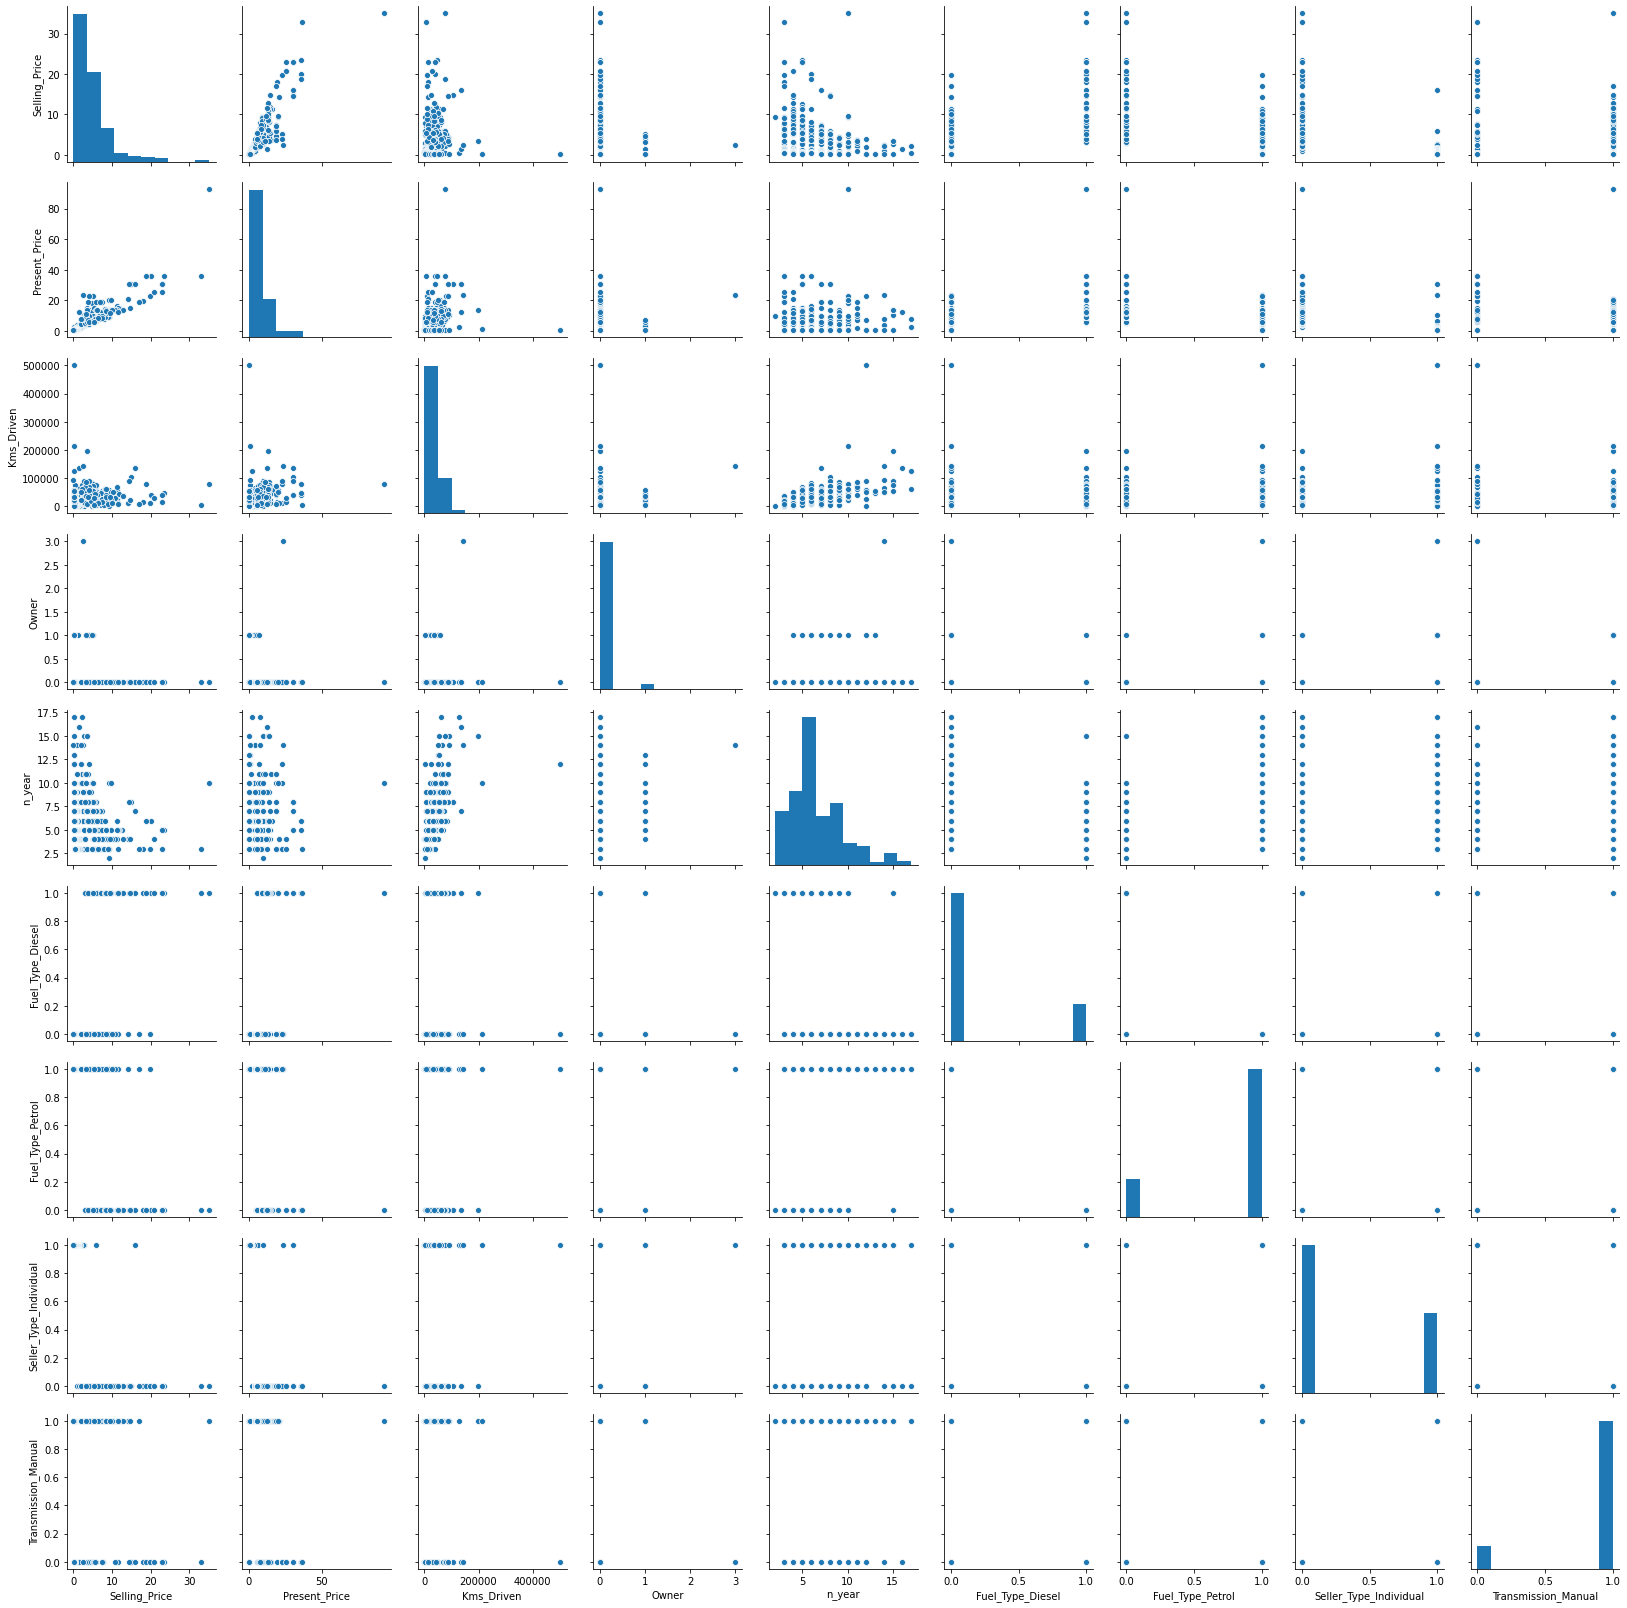

In [31]:
sns.pairplot(car_data)

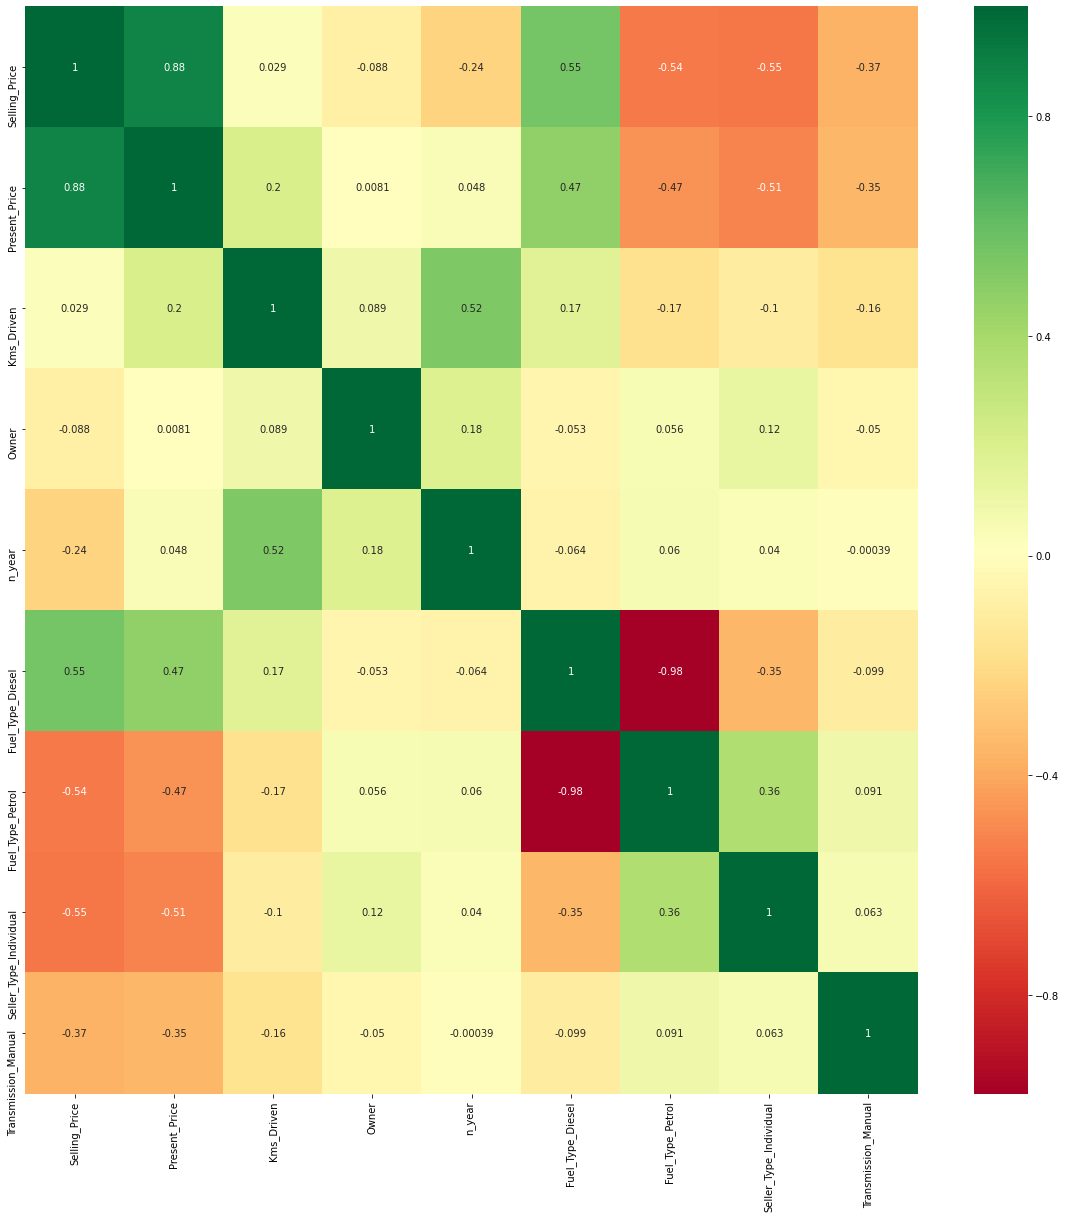

In [38]:
cor_matrix = car_data.corr()
top_correlation_feature = cor_matrix.index
plt.figure(figsize=(20,20))

#plot heatmap
g = sns.heatmap(car_data[top_correlation_feature].corr(), annot=True, cmap='RdYlGn')

In [39]:
car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Seperating Feature and Label data

In [41]:
X = car_data.iloc[:, 1:]
y = car_data.iloc[:,0]

### Feature Importance

In [48]:
model = ExtraTreesRegressor(n_estimators=100)
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [49]:
print(model.feature_importances_)

[0.36544629 0.03915071 0.00040559 0.0760575  0.23977557 0.01343673
 0.12519464 0.14053296]


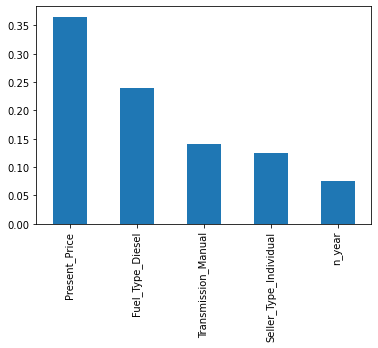

In [50]:
# top 5 features
top_five_features = pd.Series(model.feature_importances_, index=X.columns)
top_five_features.nlargest(5).plot(kind='bar')
plt.show()

#### dividing dataset for train and test data

In [66]:
Xtrain, xtest, Ytrain,ytest = train_test_split(X,y, test_size=.25)


#### Machine Learing Algorithm

In [82]:
RFR = RandomForestRegressor(n_estimators=100)


In [80]:
# hyperparameter 
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


In [81]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [84]:
# using RandomizedSearchCV
RSC = RandomizedSearchCV(estimator = RFR, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)


In [85]:
RSC.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   41.6s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...


In [88]:
predict_with_test_data = RSC.predict(xtest)
predict_with_test_data

array([ 7.27105,  4.45405, 21.98625,  6.06197,  2.86657,  4.99117,
        5.03096,  0.43199,  5.83939,  4.6141 ,  5.8719 ,  0.63541,
        0.67413,  6.27111,  3.6474 ,  0.99174, 10.43113,  0.47867,
        4.3337 ,  5.3031 ,  4.7583 ,  0.45852,  5.39178,  7.31294,
        4.3954 ,  0.52449,  0.69571,  0.43175,  8.01716,  8.64046,
        4.87479,  0.522  ,  3.93102,  3.80093,  6.19555,  3.10256,
        3.9566 ,  5.5337 , 10.16378,  9.1674 ,  0.67032,  7.74888,
       10.13042,  3.35048,  7.02955,  0.59315,  8.3605 ,  5.4136 ,
        4.98971,  5.03932,  9.10825, 12.62356,  7.77439,  6.97327,
        0.5988 ,  3.50525,  8.1398 ,  4.74529,  0.7914 ,  5.21109,
        4.07401,  3.0772 ,  5.09679,  1.12033,  6.67504,  6.07508,
        6.15755,  0.67297,  4.79215,  1.48534,  4.40879,  5.49148,
        2.9138 ,  1.26142,  4.56968, 18.88206])

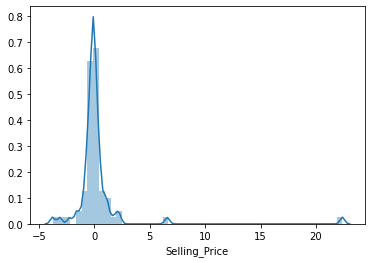

In [89]:
# checking predicted accuracy 
sns.distplot(ytest-predict_with_test_data)

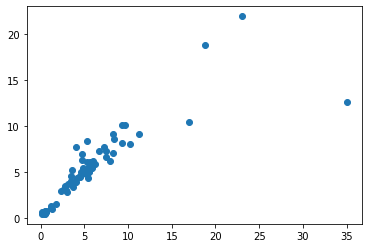

In [92]:
# checking predicted accuracy using scatter plot
plt.scatter(ytest,predict_with_test_data)

The plot is slmost linear, that means my model is very good

### Saving Project

In [94]:
file = open('car_price_prediction.pkl', 'wb')

pickle.dump(RSC, file)